In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
#import tensorflow as tf
#from keras.layers import Dense
#from keras.models import Sequential
import numpy as np


In [32]:
df = pd.read_csv('BlackFriday.csv')

def basicInfo():
    print("Shape of dataframe " + str(df.shape))
    print('NA values in each column')
    print(pd.isna(df).sum())
    print('----------------------------')
    print('NULL values in each column')
    print(pd.isnull(df).sum())

basicInfo()


Shape of dataframe (537577, 12)
NA values in each column
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64
----------------------------
NULL values in each column
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase               

In [33]:
def removingColumns (df, l):
    df = df.drop(l, axis=1)
    return df

def changeType(d):
    for col in d:
        if col != "Purchase":
            d[col]=d[col].astype('category')
    return d

d = removingColumns(df,['User_ID','Product_ID','Occupation','Product_Category_1','Product_Category_2','Product_Category_3'])
d = d.sample(frac=0.5,random_state=100)
x= removingColumns(d,['Purchase'])
y= d['Purchase']
x = changeType(x)
x= pd.get_dummies(x)

Average Purchase amount made by Men and Women
Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64


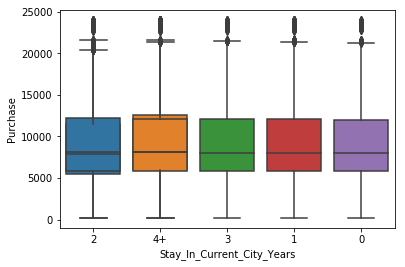

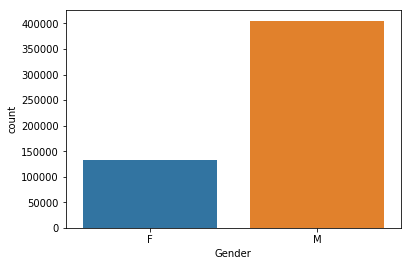

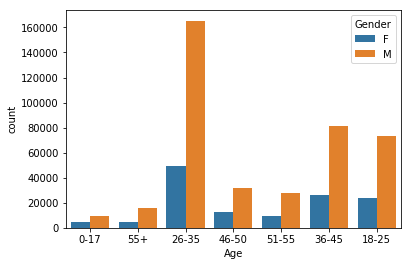

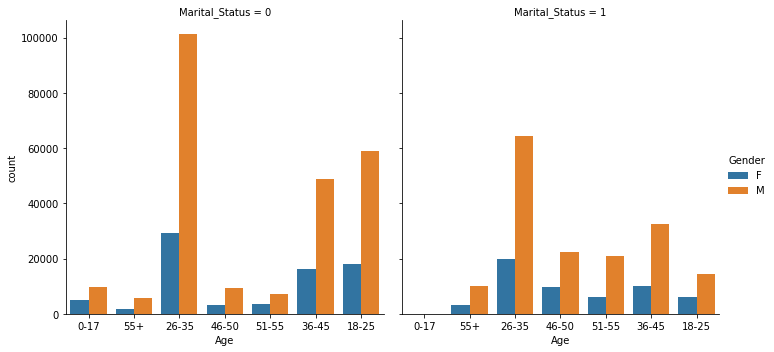

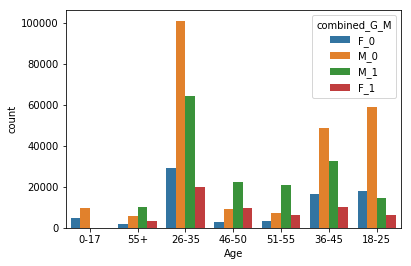

Top 5 Customers who made the maximum purchase in terms of the money spent
User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
Name: Purchase, dtype: int64
Top 5 Products that were sold the most
Product_ID
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
Name: Purchase, dtype: int64


In [34]:
def runEda():

    sns.boxplot(x='Gender', y='Purchase', data=df)
    print('Average Purchase amount made by Men and Women')
    print(df.groupby('Gender')['Purchase'].mean())
    sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=df)
    plt.show()

    # Men make more purchase when compared to women
    sns.countplot(x='Gender', data=df)
    plt.show()

    # Men of age 26-25 make the most purchase
    sns.countplot(x='Age',hue='Gender', data=df)
    plt.show()

    # Single Men of age 26-25 make the most purchase
    sns.catplot(x='Age', hue='Gender', col='Marital_Status', data=df, kind='count')
    plt.show()

    df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
    sns.countplot(df['Age'],hue=df['combined_G_M'])
    plt.show()

    topCustomers = df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)
    print('Top 5 Customers who made the maximum purchase in terms of the money spent')
    print(topCustomers.head(5))

    mostSoldProducts = df.groupby('Product_ID')['Purchase'].count().sort_values(ascending=False)
    print('Top 5 Products that were sold the most')
    print(mostSoldProducts.head(5))

runEda()

In [35]:
#BUILDING MODELS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

C:\Users\saran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saran\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\saran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saran\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
#LINEAR REGRESSION

def runLinearRegression():
    lm = linear_model.LinearRegression()
    lm.fit(x_train,y_train)
    lm.predict(x_test)
    cv_results = cross_val_score(lm,x,y,cv=10)
    print(lm.score(x_test,y_test))
    print(np.mean(cv_results))
runLinearRegression()
# This shows the model fits the data horribly

-2.616815891513542e+18
0.00927580912979602


0.008680536860422106
Lasso Score = 0.008520789019600294


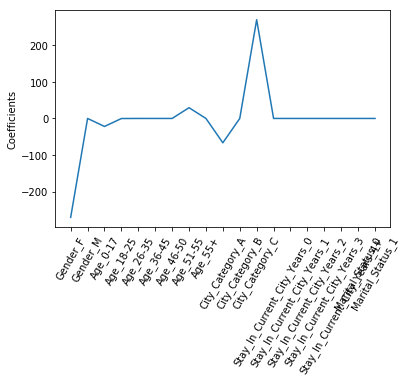

In [38]:
#LASSO REGRESSION

def lassoRegression():
    lasso = Lasso(alpha=0.1, normalize=True)
    lasso.fit(x_train, y_train)
    lasso.predict(x_test)
    lasso_cv = cross_val_score(lasso,x,y,cv=10)
    print(np.mean(lasso_cv))
    print('Lasso Score = ' + str(lasso.score(x_test, y_test)))
    lasso_coef = lasso.fit(x_train,y_train).coef_
    names = x.columns
    _ = plt.plot(range(len(names)), lasso_coef)
    _ = plt.xticks(range(len(names)), names, rotation=60)
    _ = plt.ylabel('Coefficients')
    plt.show()
lassoRegression()

Accuracy of Random Forest Regression:  0.014401410069882603


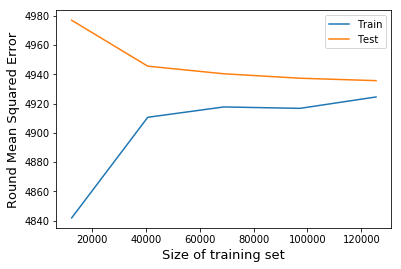

In [39]:
# RANDOM FOREST CLASSIFIER
#LEARNING CURVE

def randomForestRegression():
    randomForest = RandomForestRegressor(n_estimators=200,  max_depth=10)
    randomForest.fit(x_train, y_train)
    randomForest.predict(x_test)
    print("Accuracy of Random Forest Regression: ", randomForest.score(x_test, y_test))
    sizes, train_scores, test_scores = learning_curve(randomForest,x_train,y_train, cv=3, scoring='neg_mean_squared_error')
    train_scores = np.mean((-1*train_scores)**0.5, axis=1)
    test_scores = np.mean((-1*test_scores)**0.5, axis=1)
    sns.lineplot(sizes, train_scores, label="Train")
    sns.lineplot(sizes, test_scores, label="Test")
    plt.xlabel("Size of training set", size=13)
    plt.ylabel("Round Mean Squared Error", size=13)
    plt.show()

randomForestRegression()

#This shows that the model suffers from high bias problem. That is, the model is underfitting the data
